In [9]:
import numpy as np
import os

import tensorflow as tf
import matplotlib.pyplot as plt
import librosa.display
from tensorflow.keras import layers, models



In [10]:
def snr_loss(y_true, y_pred):
    """
    Custom loss function based on Signal-to-Noise Ratio (SNR).
    Args:
    - y_true: Ground truth spectrogram (clean STFT or mel-spectrogram).
    - y_pred: Predicted spectrogram (denoised output from the model).
    
    Returns:
    - Loss value: Negative SNR to make it suitable for minimization.
    """
    # Calculate the signal power (sum of squares of the true signal)
    signal_power = tf.reduce_sum(tf.square(y_true), axis=[1, 2])

    # Calculate the noise power (sum of squares of the difference)
    noise_power = tf.reduce_sum(tf.square(y_true - y_pred), axis=[1, 2])

    # Compute SNR in dB (add epsilon to avoid division by zero)
    snr = 10.0 * tf.math.log((signal_power + 1e-8) / (noise_power + 1e-8)) / tf.math.log(10.0)

    # Take the mean SNR over the batch
    mean_snr = tf.reduce_mean(snr)

    # Return negative SNR as loss
    return -mean_snr

In [11]:
clean_dir = r'C:\Users\Siddhartha Devan V\Downloads\Fellowship\complete_dataset\Clean\spectrogram'
noise_dir = r'C:\Users\Siddhartha Devan V\Downloads\Fellowship\complete_dataset\Noise\spectrogram'

clean_spect_paths = os.listdir(clean_dir)
noise_spect_paths = os.listdir(noise_dir)

for i, j in zip(clean_spect_paths, noise_spect_paths):
    print(i,j)
    if i != j:
        print('not equal')

100_0.npy 100_0.npy
100_1.npy 100_1.npy
100_2.npy 100_2.npy
100_3.npy 100_3.npy
101_0.npy 101_0.npy
101_1.npy 101_1.npy
101_2.npy 101_2.npy
101_3.npy 101_3.npy
101_4.npy 101_4.npy
102_0.npy 102_0.npy
102_1.npy 102_1.npy
102_2.npy 102_2.npy
102_3.npy 102_3.npy
103_0.npy 103_0.npy
103_1.npy 103_1.npy
103_2.npy 103_2.npy
103_3.npy 103_3.npy
104_0.npy 104_0.npy
104_1.npy 104_1.npy
104_2.npy 104_2.npy
104_3.npy 104_3.npy
11_0.npy 11_0.npy
11_1.npy 11_1.npy
12_0.npy 12_0.npy
12_1.npy 12_1.npy
13_0.npy 13_0.npy
13_1.npy 13_1.npy
14_0.npy 14_0.npy
14_1.npy 14_1.npy
15_0.npy 15_0.npy
15_1.npy 15_1.npy
16_0.npy 16_0.npy
16_1.npy 16_1.npy
17_0.npy 17_0.npy
17_1.npy 17_1.npy
17_2.npy 17_2.npy
18_0.npy 18_0.npy
18_1.npy 18_1.npy
18_2.npy 18_2.npy
18_3.npy 18_3.npy
18_4.npy 18_4.npy
19_0.npy 19_0.npy
19_1.npy 19_1.npy
19_2.npy 19_2.npy
19_3.npy 19_3.npy
19_4.npy 19_4.npy
1_0.npy 1_0.npy
1_1.npy 1_1.npy
1_2.npy 1_2.npy
1_3.npy 1_3.npy
1_4.npy 1_4.npy
201_0.npy 201_0.npy
202_0.npy 202_0.npy
203_0.npy 

In [12]:
clean_spect_paths = [os.path.join(clean_dir, i) for i in clean_spect_paths]
noise_spect_paths = [os.path.join(noise_dir, i) for i in noise_spect_paths]

print(clean_spect_paths[:5])
print()
print(noise_spect_paths[:5])

['C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowship\\complete_dataset\\Clean\\spectrogram\\100_0.npy', 'C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowship\\complete_dataset\\Clean\\spectrogram\\100_1.npy', 'C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowship\\complete_dataset\\Clean\\spectrogram\\100_2.npy', 'C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowship\\complete_dataset\\Clean\\spectrogram\\100_3.npy', 'C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowship\\complete_dataset\\Clean\\spectrogram\\101_0.npy']

['C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowship\\complete_dataset\\Noise\\spectrogram\\100_0.npy', 'C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowship\\complete_dataset\\Noise\\spectrogram\\100_1.npy', 'C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowship\\complete_dataset\\Noise\\spectrogram\\100_2.npy', 'C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowship\\complete_dataset\\Noise\\spectrogram\\100_3.npy', 'C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowshi

In [13]:
print(np.load(clean_spect_paths[1]).ndim)
print(np.load(noise_spect_paths[1]).ndim)

2
2


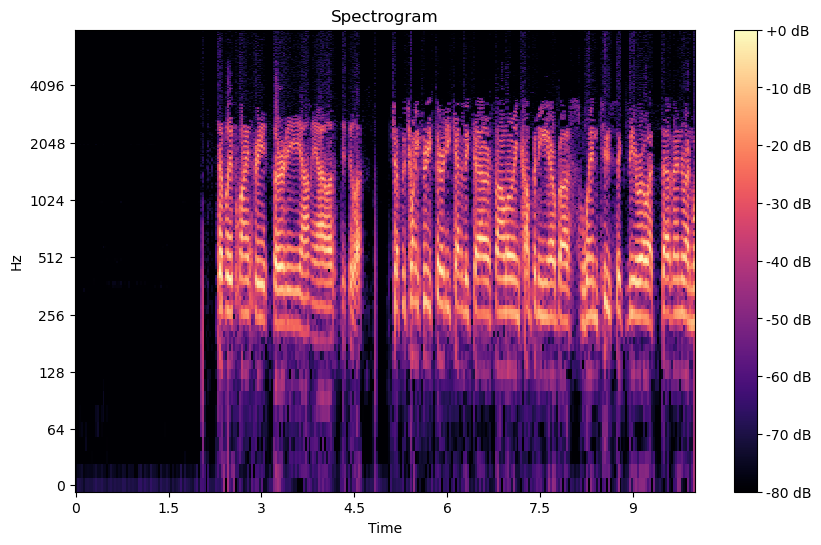

In [14]:
def plot_spectrogram(spectrogram, sr=16000, hop_length=512, title="Spectrogram"):
    """
    Visualizes a spectrogram using librosa and matplotlib.
    """
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max),
                             sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()
plot_spectrogram(np.load(clean_spect_paths[190]))

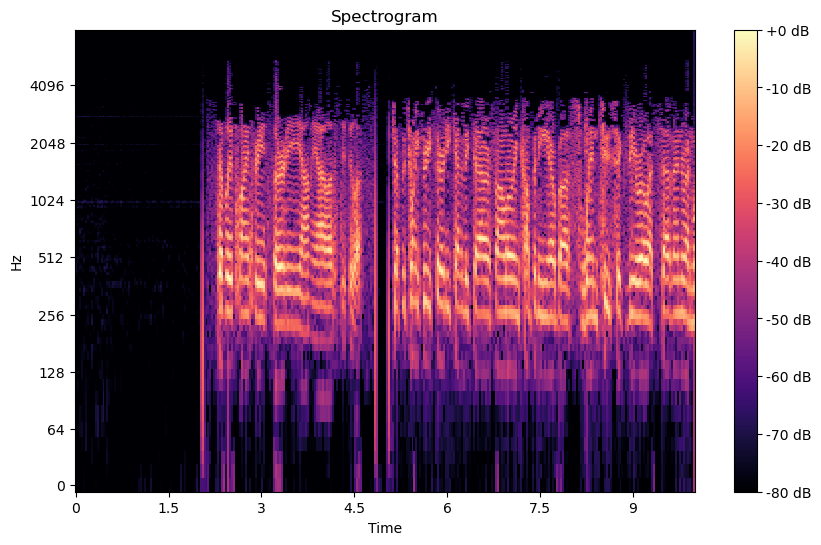

In [15]:
plot_spectrogram(np.load(noise_spect_paths[190]))

In [16]:
from sklearn.model_selection import train_test_split

train_noisy, test_noisy, train_clean, test_clean = train_test_split(noise_spect_paths, clean_spect_paths, test_size=0.2, random_state=42)


In [17]:
print(len(train_noisy))
print(len(test_noisy))
print(len(train_clean))
print(len(test_clean))

247
62
247
62


In [18]:
train_data = tf.data.Dataset.from_tensor_slices((train_noisy, train_clean))
test_data = tf.data.Dataset.from_tensor_slices((test_noisy, test_clean))

In [19]:
def loader_func(noise_path, clean_path):
    noise = tf.convert_to_tensor(tf.numpy_function(lambda x: np.expand_dims(np.load(x).astype(np.float16), axis = -1), [noise_path], tf.float16))
    clean = tf.convert_to_tensor(tf.numpy_function(lambda x: np.expand_dims(np.load(x).astype(np.float16), axis = -1), [clean_path], tf.float16))
                              
    return noise, clean

train_data = train_data.map(loader_func, num_parallel_calls=tf.data.AUTOTUNE)
test_data = test_data.map(loader_func, num_parallel_calls=tf.data.AUTOTUNE)


batch_size = 2 # Choose an appropriate batch size for your model

# Batch the dataset
train_data = train_data.batch(batch_size).prefetch(tf.data.AUTOTUNE)



# Batch the dataset
test_data = test_data.batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [20]:
for x, y in train_data.take(2):
    print(x.shape, x.dtype)
    
    

(2, 513, 313, 1) <dtype: 'float16'>
(2, 513, 313, 1) <dtype: 'float16'>


In [21]:
for x, y in test_data.take(2):
    print(x.shape, y.dtype)

(2, 513, 313, 1) <dtype: 'float16'>
(2, 513, 313, 1) <dtype: 'float16'>


In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Input shape (height, width, channels)
input_shape = (513, 313, 1)

# Build the model
def build_denoising_autoencoder(input_shape):
    inputs = layers.Input(shape=input_shape)

    # # Encoder
    # x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    # x = layers.MaxPooling2D((2, 2), padding='same')(x)  # Output: (256, 157, 32)
    
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)  # Output: (128, 79, 64)
    
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)  # Output: (64, 40, 128)
    
    # Bottleneck
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)  # Output: (64, 40, 256)
    
    # Decoder with explicit upsampling layers
    x = layers.UpSampling2D((2, 2))(x)  # Output: (128, 80, 256)
    x = layers.Conv2DTranspose(128, (3, 3), activation='relu', padding='same')(x)  # Output: (128, 80, 128)
    
    x = layers.UpSampling2D((2, 2))(x)  # Output: (256, 160, 128)
    x = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)  # Output: (256, 160, 64)
    
    # x = layers.UpSampling2D((2, 2))(x)  # Output: (512, 320, 64)
    # x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)  # Output: (512, 320, 32)

    # Final reconstruction to match the input shape
    outputs = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)  # Output: (513, 313, 1)

    outputs = layers.Cropping2D(cropping=((2, 1), (2, 1)))(outputs)
    # outputs = layers.Cropping2D(cropping=((0,1), (1,1)))(outputs)
    # Create the model
    autoencoder = models.Model(inputs, outputs)
    
    return autoencoder

# Build the model
autoencoder = build_denoising_autoencoder(input_shape)

# Compile the model
autoencoder.compile(optimizer='adam', loss=snr_loss, metrics=['mae', 'mse'])




In [24]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 513, 313, 1)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 513, 313, 64)      640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 257, 157, 64)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 257, 157, 128)     73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 129, 79, 128)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 129, 79, 256)      2951

In [22]:
tf.keras.utils.plot_model(autoencoder)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [25]:
history = autoencoder.fit(train_data, epochs=25)

Epoch 1/25
124/124 [==============================] - 50s 267ms/step - loss: 4.2849 - mae: 0.5107 - mse: 5.6817
Epoch 2/25
124/124 [==============================] - 30s 239ms/step - loss: -0.4894 - mae: 0.3897 - mse: 5.6027
Epoch 3/25
124/124 [==============================] - 29s 237ms/step - loss: -0.4917 - mae: 0.3855 - mse: 5.5973
Epoch 4/25
124/124 [==============================] - 29s 236ms/step - loss: -0.4956 - mae: 0.3842 - mse: 5.5960
Epoch 5/25
124/124 [==============================] - 29s 235ms/step - loss: -0.4983 - mae: 0.3816 - mse: 5.5933
Epoch 6/25
124/124 [==============================] - 29s 235ms/step - loss: -0.4970 - mae: 0.3803 - mse: 5.5916
Epoch 7/25
124/124 [==============================] - 29s 235ms/step - loss: -0.4977 - mae: 0.3817 - mse: 5.5943
Epoch 8/25
124/124 [==============================] - 29s 234ms/step - loss: -0.4525 - mae: 0.3803 - mse: 5.5924
Epoch 9/25
124/124 [==============================] - 29s 233ms/step - loss: -0.4781 - mae: 0.382

In [26]:
autoencoder.evaluate(test_data)

31/31 [==============================] - 5s 94ms/step - loss: -0.4994 - mae: 0.3646 - mse: 6.1528


[-0.4993615746498108, 0.36459463834762573, 6.152810573577881]

In [27]:
denoised_output = autoencoder.predict(test_data)

31/31 [==============================] - 3s 100ms/step


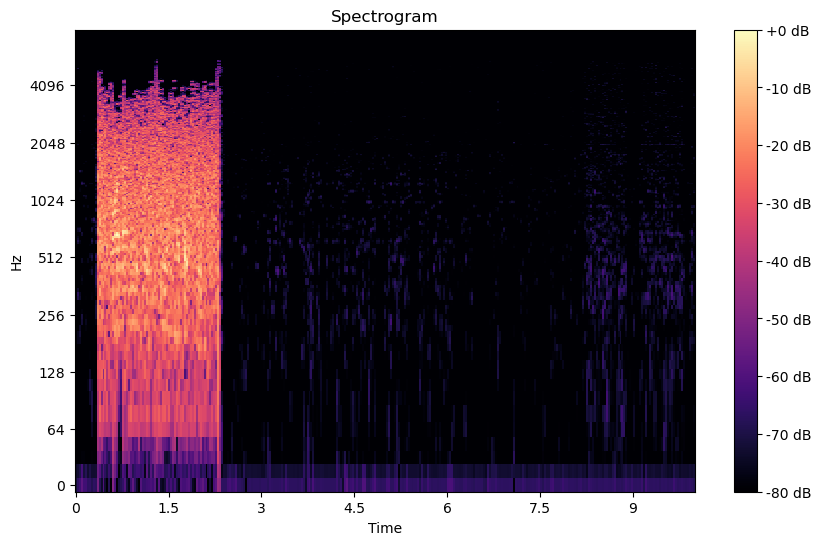

In [51]:
for x, y in test_data.take(1):
    plot_spectrogram(np.squeeze(y[1]))

In [ ]:
plot_spectrogram(np.squeeze(test_data.take(1))

TypeError: 'TakeDataset' object is not subscriptable

In [47]:
denoised_output.shape

(62, 513, 313, 1)

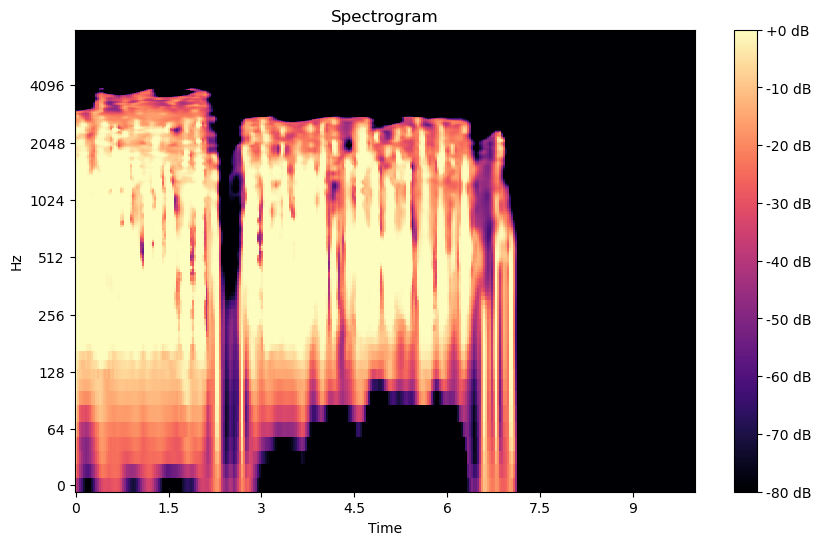

In [58]:
plot_spectrogram(np.squeeze(denoised_output[1]))

Text(0.5, 1.0, 'loss')

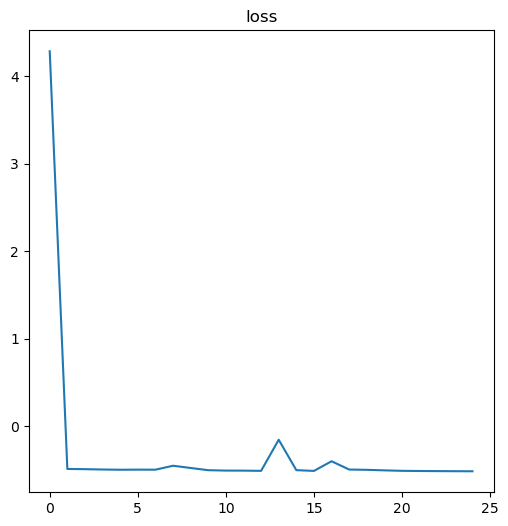

In [29]:
plt.figure(figsize=(6,6))
plt.plot(history.history['loss'])
plt.title('loss')

Text(0.5, 1.0, 'mae')

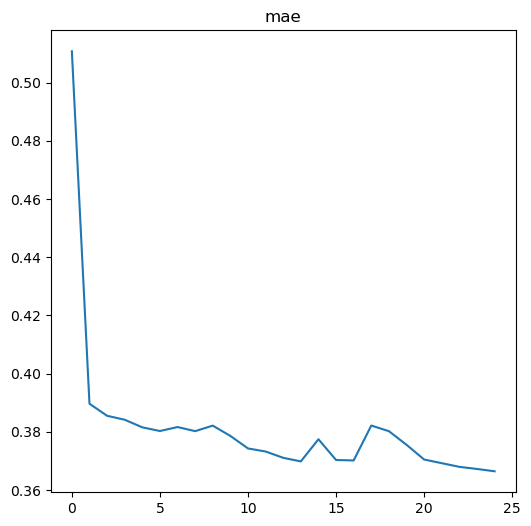

In [30]:
plt.figure(figsize=(6,6))
plt.plot(history.history['mae'])
plt.title('mae')

Text(0.5, 1.0, 'mse')

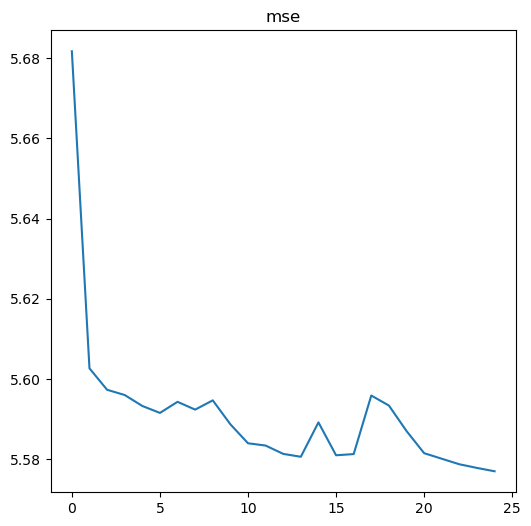

In [31]:
plt.figure(figsize=(6,6))
plt.plot(history.history['mse'])
plt.title('mse')